In [12]:
import numpy as np

from mt.ct_utils import show_in_napari
%load_ext autoreload
%autoreload 2
import pandas as pd
from mt.scan import Scan


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
path = "../../04_uCT/AD67/"
scan = Scan(path)
scan.load(logging=True)

Loading pickled Scan object from: ../../04_uCT/AD67/Scan.pkl
Loading images from:  ../../04_uCT/AD67/Slices/
Loaded stack with shape (1781, 126, 2231) and a size of 1.00 GB in 4.67 s.
Loaded _mask from: ../../04_uCT/AD67/_mask.npy
Loaded _particle_mask from: ../../04_uCT/AD67/_particle_mask.npy
Loaded _tesselation from: ../../04_uCT/AD67/_tesselation.npy


In [3]:
scan.show(axis="z")

In [13]:
pd.to_pickle(scan.particle_statistics, scan.path + "particle_statistics.pkl")

In [8]:
scan.calculate_properties(logging=True)

Starting mask analysis.
Starting particle analysis.


In [10]:
scan.save()

In [12]:
cle.select_device('RTX')

(OpenCL) NVIDIA GeForce RTX 4070 SUPER (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              560.70
	Device Type:                 GPU
	Compute Units:               56
	Global Memory Size:          12281 MB
	Maximum Object Size:         3070 MB
	Max Clock Frequency:         2505 MHz
	Image Support:               Yes

In [69]:
im = scan.particle_mask
n_erosions = 7

In [64]:
from mt.ct_utils import *


In [66]:
v_tess = voronoi_tesselation(scan.stack, 
                             SegmentationSettings(particle_n_erosions=7,
                                                  particle_mask_sigma=0.8))

In [23]:
sigma = 0.8
n_erosions = 7

In [56]:
np.save(scan.path + "v_tess.npy", v_tess)

In [71]:
v_tess = np.transpose(v_tess, (1, 0, 2))

In [72]:
show_in_napari(np.transpose(scan.stack, (1, 0, 2)), v_tess)

In [46]:
stats = cle.statistics_of_labelled_pixels(v_tess[60])

In [50]:
import matplotlib.pyplot as plt

(array([921., 117.,  15.,   5.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([    0. ,  6470.5, 12941. , 19411.5, 25882. , 32352.5, 38823. ,
        45293.5, 51764. , 58234.5, 64705. ]),
 <BarContainer object of 10 artists>)

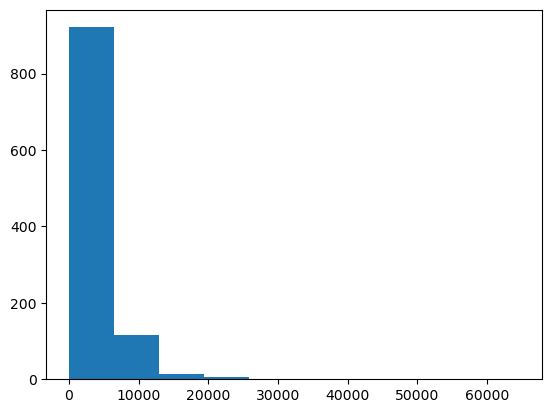

In [52]:
plt.hist(stats["area"])

In [36]:
import pandas as pd

In [47]:
stats_df = pd.DataFrame(stats)

{'sum_z': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.

In [48]:
stats_df

,sum_z,label,sum_intensity_times_z,bbox_min_x,bbox_min_y,sum_intensity_times_x,bbox_depth,bbox_min_z,bbox_max_x,bbox_max_y,...,centroid_z,sum_distance_to_centroid,mean_distance_to_centroid,sum_distance_to_mass_center,mean_distance_to_mass_center,standard_deviation_intensity,max_distance_to_centroid,max_distance_to_mass_center,mean_max_distance_to_centroid_ratio,mean_max_distance_to_mass_center_ratio
0,0.0,1.0,0.0,967.0,0.0,0.0,1.0,0.0,1061.0,65.0,...,0.0,84735.312500,23.822128,NaN,NaN,0.0,53.248215,NaN,2.235242,NaN
1,0.0,2.0,0.0,1750.0,0.0,0.0,1.0,0.0,1903.0,64.0,...,0.0,294627.937500,38.418037,NaN,NaN,0.0,86.697098,NaN,2.256677,NaN
2,0.0,3.0,0.0,520.0,0.0,0.0,1.0,0.0,755.0,54.0,...,0.0,579007.437500,56.748749,NaN,NaN,0.0,122.332321,NaN,2.155683,NaN
3,0.0,4.0,0.0,880.0,0.0,0.0,1.0,0.0,1013.0,100.0,...,0.0,308267.031250,37.324982,NaN,NaN,0.0,81.779289,NaN,2.191007,NaN
4,0.0,5.0,0.0,1296.0,0.0,0.0,1.0,0.0,1346.0,48.0,...,0.0,35314.246094,17.277029,NaN,NaN,0.0,33.008099,NaN,1.910519,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,0.0,1056.0,0.0,825.0,1599.0,0.0,1.0,0.0,891.0,1620.0,...,0.0,16930.900391,16.947847,NaN,NaN,0.0,35.721165,0.0,2.107711,NaN
1056,0.0,1057.0,0.0,1254.0,1600.0,0.0,1.0,0.0,1293.0,1620.0,...,0.0,4127.480957,9.151842,NaN,NaN,0.0,21.281435,0.0,2.325372,NaN
1057,0.0,1058.0,0.0,439.0,1594.0,0.0,1.0,0.0,486.0,1620.0,...,0.0,12588.667969,12.885023,NaN,NaN,0.0,30.257620,0.0,2.348278,NaN
1058,0.0,1059.0,0.0,225.0,1592.0,0.0,1.0,0.0,269.0,1620.0,...,0.0,10075.940430,12.302734,NaN,NaN,0.0,27.269760,0.0,2.216561,NaN


In [74]:
v_tess = np.load(scan.path + "v_tess.npy")

In [76]:
show_in_napari(np.transpose(scan.stack, (1, 0, 2)), np.transpose(v_tess, (1, 0, 2)))